In [1]:
import numpy as np
import pandas as pd
import thinkplot
import thinkstats2
import seaborn as sns
%matplotlib inline

In [2]:
import brfss

In [4]:
df = brfss.ReadBrfss(nrows=None)

In [7]:
df.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0


In [5]:
sample = thinkstats2.SampleRows(df, 5000)
heights, weights = sample.htm3, sample.wtkg2

In [9]:
sample.shape

(5000, 6)

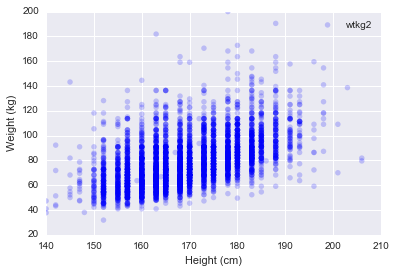

In [10]:
thinkplot.Scatter(heights, weights)
thinkplot.Show(xlabel="Height (cm)",
              ylabel="Weight (kg)",
              axis=[140,210,20,200])

In [11]:
heights = thinkstats2.Jitter(heights, 1.3)
weights = thinkstats2.Jitter(weights, 0.5)

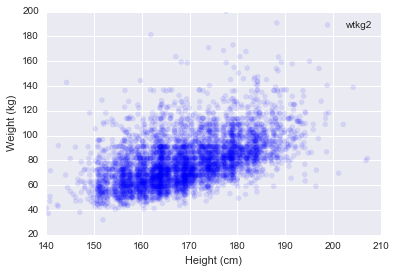

In [15]:
thinkplot.Scatter(heights, weights, alpha=0.1)
thinkplot.Show(xlabel="Height (cm)",
              ylabel="Weight (kg)",
              axis=[140,210,20,200])

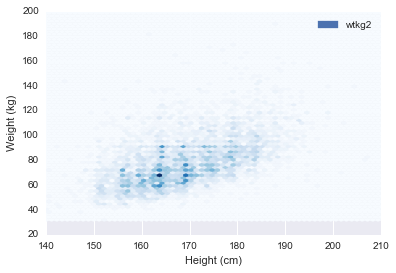

In [17]:
thinkplot.HexBin(heights, weights)
thinkplot.Show(xlabel="Height (cm)",
              ylabel="Weight (kg)",
              axis=[140,210,20,200])

In [20]:
df = df.dropna(subset=['htm3','wtkg2'])

### Characterizing Relationships
Bin one variable and plot percentiles of the other

In [22]:
bins = np.arange(135,210,5)
indices = np.digitize(df.htm3, bins)

In [25]:
groups = df.groupby(indices)

In [33]:
for i, group in groups:
    print(i,len(group))

0 305
1 228
2 477
3 2162
4 18759
5 45761
6 70610
7 72138
8 61725
9 49938
10 43555
11 20077
12 7784
13 1777
14 405
15 131


In [36]:
heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

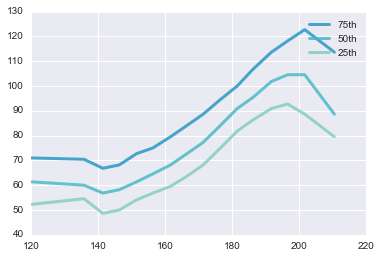

In [43]:
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(heights, weights, label=label)
thinkplot.Show()

### Covariance 

In [54]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    cov = np.dot(xs-meanx, ys-meany)/len(xs)
    return cov

### Pearson Correlation 

In [55]:
def Corr(xs, ys):
    xs = np.array(xs)
    ys = np.array(ys)
    
    meanx, varx = np.mean(xs), np.var(xs)
    meany, vary = np.mean(ys), np.var(ys)
    
    corr = Cov(xs,ys, meanx, meany)/ math.sqrt(varx * vary)
    return corr

### Spearman's Correlation 

In [56]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)